# Project 2: Fruit Finder

## Write-up

1. your results and how well things worked.

  - The result of my work is pretty good. It is able to count correctly of all 3 test image, and draw the contour around them

2. strengths and weaknesses of your approach.
  
  - My approch provide a accruate result for all 3 imgaes. However, it is not generalized for all images

3. how you selected any parameters to make things work better.

  - For open and close. It depends on how the treshold looks like. if there are more small noise, I will start with open. Otherwise, I start with close. I also try out different numbers for the threshold for red. I also look up online on the HSV chart to find the color value for orange and yellow.

4. limitations and what you would do next with more time.

- If ther is more like I think I will try to applied different filters and differet threshold methods.

5. evaluation with respect to the assignment rubric (below).

- My work meeting completely meet the requirements. I have solid effort finding accurate, show the mask, and used morphological operations. I have readable result for all 3 images. The result also contains the count numbers and total numbers.


In [887]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt

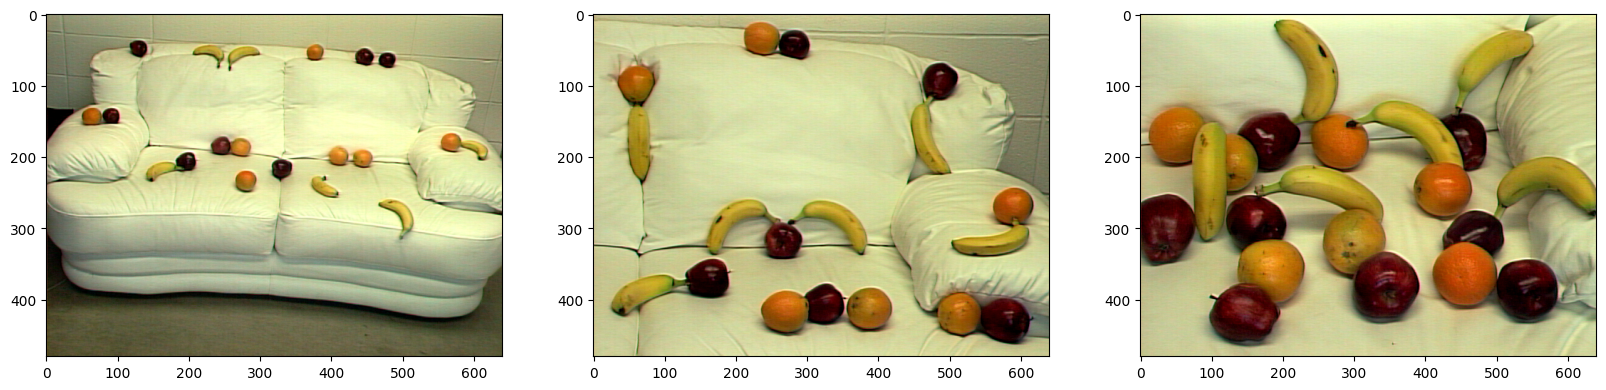

In [888]:
img1 = cv2.imread("mixed_fruit1.tiff")
img2 = cv2.imread("mixed_fruit2.tiff")
img3 = cv2.imread("mixed_fruit3.tiff")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 20))

plt.subplot(1, 3, 1)
plt.imshow(img1)

plt.subplot(1, 3, 2)
plt.imshow(img2)

plt.subplot(1, 3, 3)
plt.imshow(img3)

# Apple

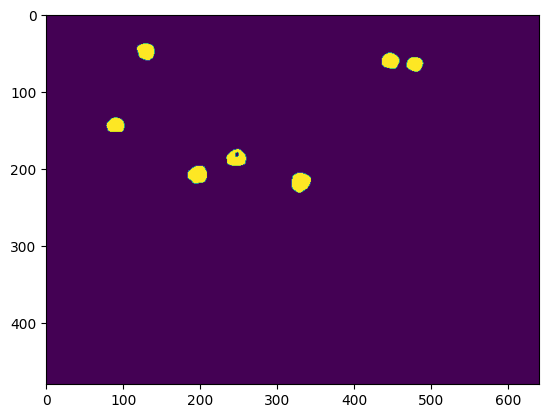

In [889]:
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gauss_img1 = cv2.GaussianBlur(gray_img1, (13, 13), 0)
_, apple = cv2.threshold(gauss_img1, 70, 255, cv2.THRESH_BINARY_INV)
apple[270:, :] = 0
apple[:, :70] = 0

plt.imshow(apple)

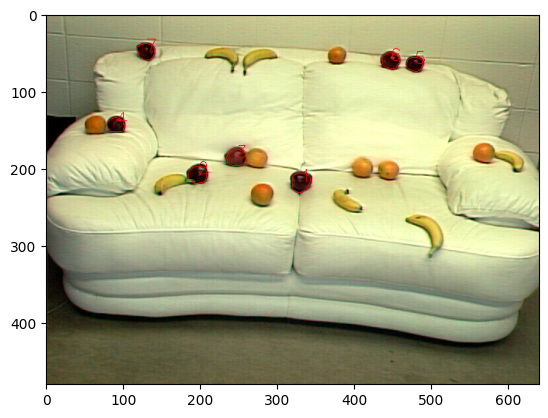

In [890]:
img1 = cv2.imread("mixed_fruit1.tiff")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
closed = cv2.morphologyEx(apple, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
apple = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

contours, _ = cv2.findContours(apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for (i, c) in enumerate(contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (255, 0, 0), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)

plt.imshow(img1)

# Banana

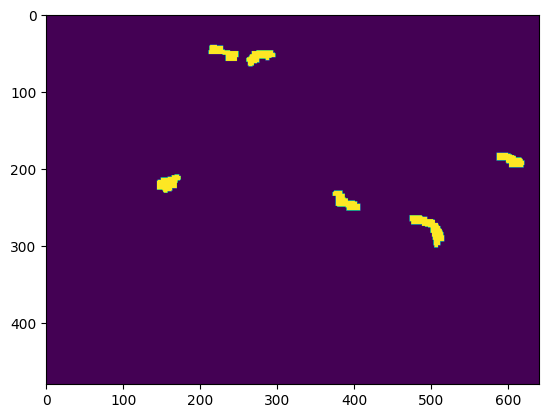

In [891]:
img1 = cv2.imread("mixed_fruit1.tiff")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

banana = cv2.inRange(img1, (23, 100, 150), (25, 255, 255))

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
closed = cv2.morphologyEx(banana, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
banana = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

plt.imshow(banana)

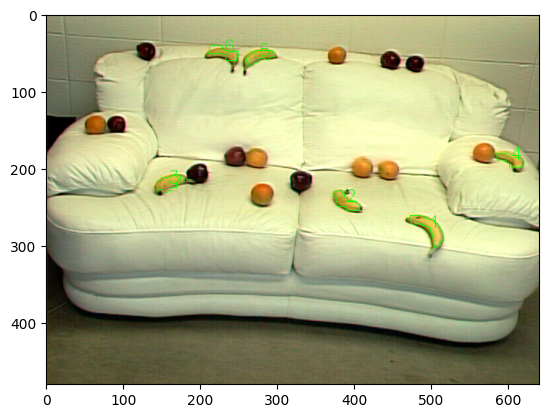

In [892]:
img1 = cv2.imread("mixed_fruit1.tiff")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
contours, _ = cv2.findContours(banana, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for (i, c) in enumerate(contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (0, 255, 0), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

plt.imshow(img1)

# Orange

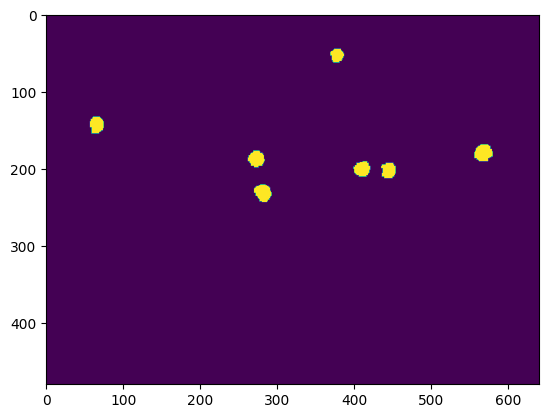

In [893]:
img1 = cv2.imread("mixed_fruit1.tiff")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

orange = cv2.inRange(img1, (0, 200, 150), (21, 255, 255))

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
closed = cv2.morphologyEx(orange, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
orange = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

plt.imshow(orange)

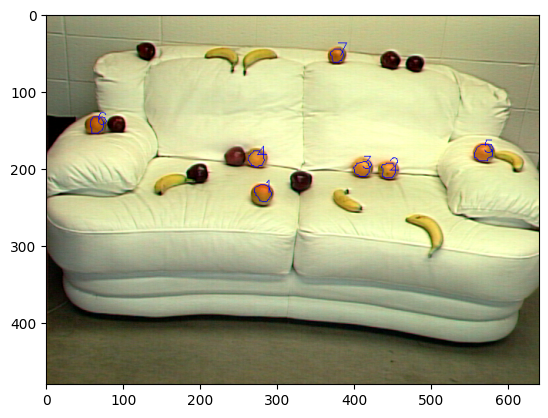

In [894]:
img1 = cv2.imread("mixed_fruit1.tiff")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
contours, _ = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for (i, c) in enumerate(contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (0, 0, 255), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)

plt.imshow(img1)

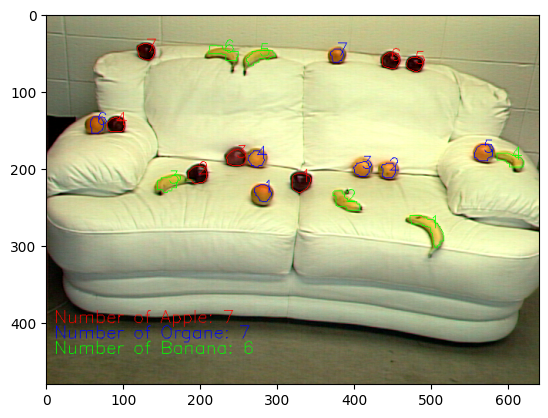

In [895]:
orange_contours, _ = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
banana_contours, _ = cv2.findContours(banana, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
apple_contours, _ = cv2.findContours(apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for (i, c) in enumerate(orange_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (0, 0, 255), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)

for (i, c) in enumerate(banana_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (0, 255, 0), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

for (i, c) in enumerate(apple_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img1, [c], -1, (255, 0, 0), 1)
  cv2.putText(img1, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)

cv2.putText(img1, "Number of Apple: "+str(len(apple_contours)), (10, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)
cv2.putText(img1, "Number of Organe: "+str(len(orange_contours)), (10, 420), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)
cv2.putText(img1, "Number of Banana: "+str(len(banana_contours)), (10, 440), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

plt.imshow(img1)

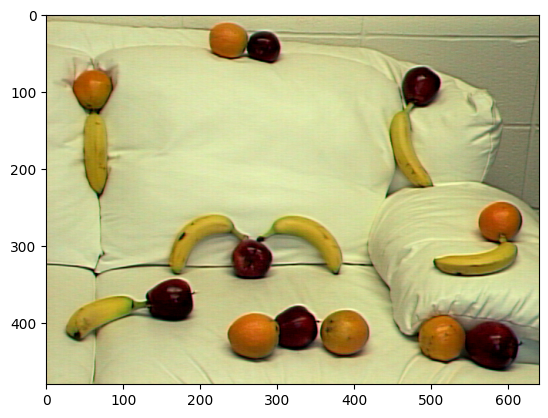

In [896]:
plt.imshow(img2)

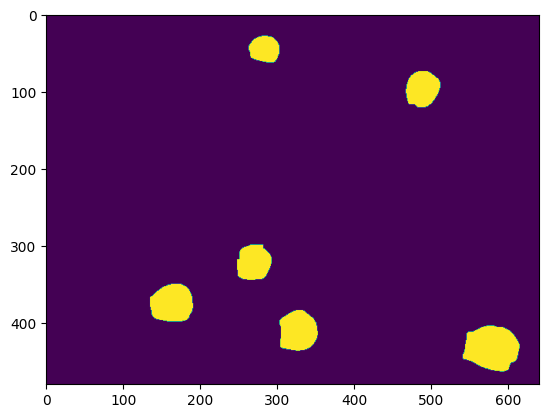

In [897]:
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gauss_img2 = cv2.GaussianBlur(gray_img2, (13, 13), 0)
_, apple = cv2.threshold(gauss_img2, 40, 255, cv2.THRESH_BINARY_INV)

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
closed = cv2.morphologyEx(apple, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
apple = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

plt.imshow(apple)

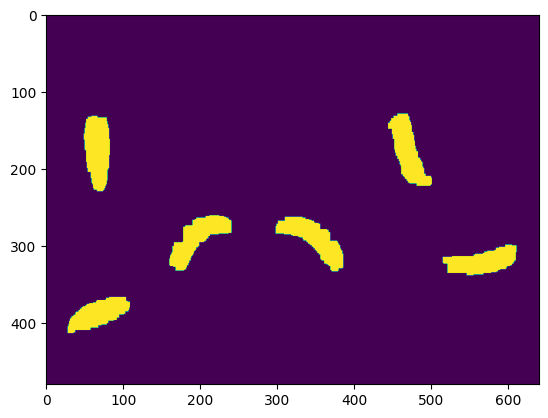

In [898]:
img2 = cv2.imread("mixed_fruit2.tiff")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

banana = cv2.inRange(img2, (20, 100, 100), (35, 255, 255))


strel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
open = cv2.morphologyEx(banana, cv2.MORPH_OPEN, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (24, 24))
banana = cv2.morphologyEx(open, cv2.MORPH_CLOSE, strel)


plt.imshow(banana)

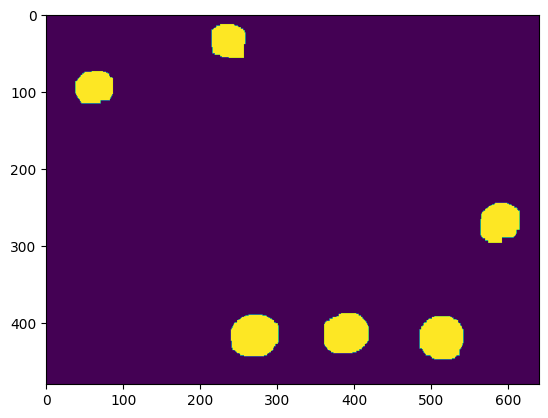

In [899]:
img2 = cv2.imread("mixed_fruit2.tiff")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)

orange = cv2.inRange(img2, (0, 150, 100), (21, 255, 255))

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
closed = cv2.morphologyEx(orange, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
orange = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

plt.imshow(orange)

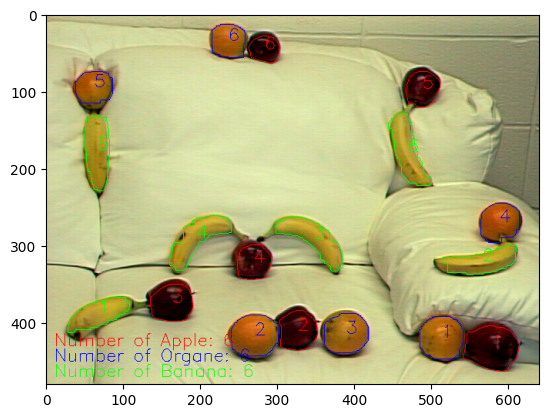

In [900]:
img2 = cv2.imread("mixed_fruit2.tiff")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

orange_contours, _ = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
banana_contours, _ = cv2.findContours(banana, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
apple_contours, _ = cv2.findContours(apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for (i, c) in enumerate(orange_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img2, [c], -1, (0, 0, 255), 1)
  cv2.putText(img2, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)

for (i, c) in enumerate(banana_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img2, [c], -1, (0, 255, 0), 1)
  cv2.putText(img2, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

for (i, c) in enumerate(apple_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img2, [c], -1, (255, 0, 0), 1)
  cv2.putText(img2, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)

cv2.putText(img2, "Number of Apple: "+str(len(apple_contours)), (10, 430), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)
cv2.putText(img2, "Number of Organe: "+str(len(orange_contours)), (10, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)
cv2.putText(img2, "Number of Banana: "+str(len(banana_contours)), (10, 470), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

plt.imshow(img2)

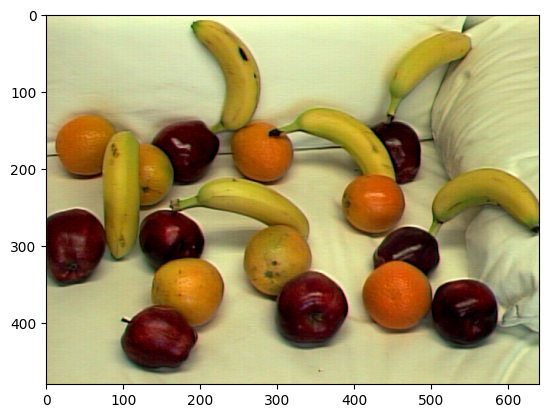

In [901]:
plt.imshow(img3)

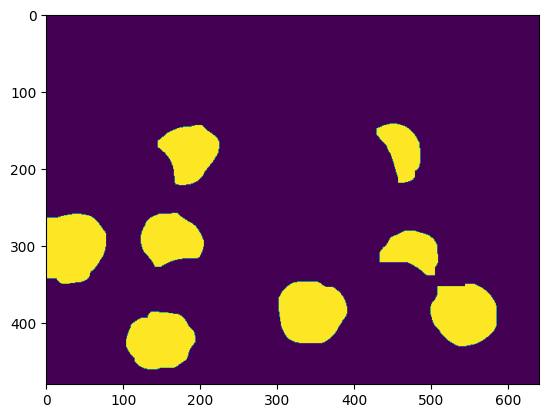

In [902]:
gray_img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
gauss_img3 = cv2.GaussianBlur(gray_img3, (13, 13), 0)
_, apple = cv2.threshold(gauss_img3, 40, 255, cv2.THRESH_BINARY_INV)

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
closed = cv2.morphologyEx(apple, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
apple = cv2.morphologyEx(closed, cv2.MORPH_OPEN, strel)

plt.imshow(apple)

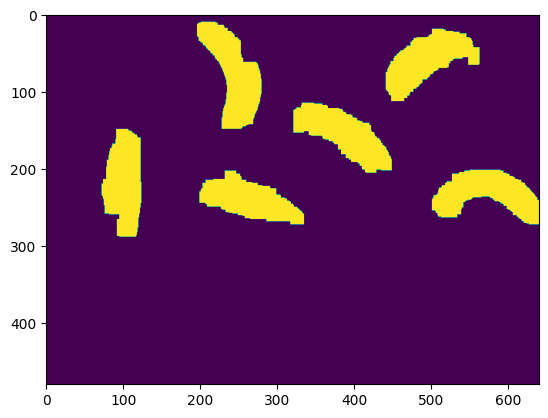

In [903]:
img3 = cv2.imread("mixed_fruit3.tiff")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
img3[288:, :] = 0

banana = cv2.inRange(img3, (23, 100, 100), (35, 255, 255))

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 6))
close = cv2.morphologyEx(banana, cv2.MORPH_CLOSE, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (14, 13))
banana = cv2.morphologyEx(close, cv2.MORPH_OPEN, strel)




plt.imshow(banana)

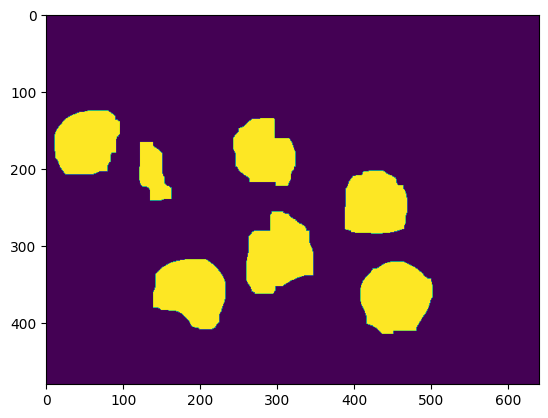

In [914]:
img3 = cv2.imread("mixed_fruit3.tiff")
gauss_img3 = cv2.GaussianBlur(img3, (15, 15), 0)
img3 = cv2.cvtColor(gauss_img3, cv2.COLOR_BGR2HSV)

orange = cv2.inRange(img3, (8, 100, 100), (22, 255, 255))

strel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
open = cv2.morphologyEx(orange, cv2.MORPH_OPEN, strel)
strel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 28))
orange = cv2.morphologyEx(open, cv2.MORPH_CLOSE, strel)


plt.imshow(orange)

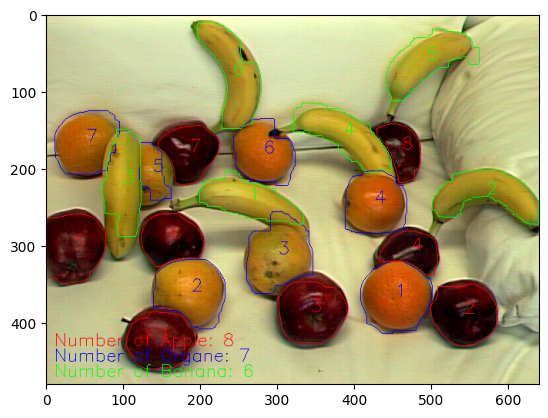

In [915]:
img3 = cv2.imread("mixed_fruit3.tiff")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

orange_contours, _ = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
banana_contours, _ = cv2.findContours(banana, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
apple_contours, _ = cv2.findContours(apple, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for (i, c) in enumerate(orange_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img3, [c], -1, (0, 0, 255), 1)
  cv2.putText(img3, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)

for (i, c) in enumerate(banana_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img3, [c], -1, (0, 255, 0), 1)
  cv2.putText(img3, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

for (i, c) in enumerate(apple_contours):

  M = cv2.moments(c)
  cx = int(M['m10'] / M['m00'])
  cy = int(M['m01'] / M['m00'])

  cv2.drawContours(img3, [c], -1, (255, 0, 0), 1)
  cv2.putText(img3, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)

cv2.putText(img3, "Number of Apple: "+str(len(apple_contours)), (10, 430), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (255, 0, 0), 1)
cv2.putText(img3, "Number of Organe: "+str(len(orange_contours)), (10, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 1)
cv2.putText(img3, "Number of Banana: "+str(len(banana_contours)), (10, 470), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 1)

plt.imshow(img3)